In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data_example.csv to Data_example (1).csv


In [ ]:
import pandas as pd
import re

import numpy as np
from sklearn import preprocessing


In [ ]:
df = pd.read_csv('/content/Data_example.csv', encoding = "ISO-8859-1")

In [ ]:
print(df)
df.info()

       X     Y        Z
0     19  1927      cat
1    NaN  2300      dog
2     15   NaN     bird
3     16  5959      cat
4     16    AB      cat
5    NaN  4594      dog
6     19  1927      cat
7     20  2879  birdËÁÒ
8     21   NaN      NaN
9      0  4096      cat
10     A  6730      cat
11    25     0     bird
12     0  2792      dog
13    33  2575    dog¹¡
14  1000  4959     bird
15    19  1927      cat
16    36  4580      dog
17    40  5869      NaN
18   NaN  4178      dog
19    45   NaN      cat
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       17 non-null     object
 1   Y       17 non-null     object
 2   Z       18 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
dfClean = df.replace(r'[^\x00-\x7F]','',regex = True)
print(dfClean)

       X     Y     Z
0     19  1927   cat
1    NaN  2300   dog
2     15   NaN  bird
3     16  5959   cat
4     16    AB   cat
5    NaN  4594   dog
6     19  1927   cat
7     20  2879  bird
8     21   NaN   NaN
9      0  4096   cat
10     A  6730   cat
11    25     0  bird
12     0  2792   dog
13    33  2575   dog
14  1000  4959  bird
15    19  1927   cat
16    36  4580   dog
17    40  5869   NaN
18   NaN  4178   dog
19    45   NaN   cat


In [ ]:
dfClean.X = pd.to_numeric(dfClean.X,errors='coerce',downcast = "integer").astype("Int64")
dfClean.Y = pd.to_numeric(dfClean.Y,errors='coerce')
dfClean.Z = dfClean.Z.astype("string")

dfClean.info()
print(dfClean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       16 non-null     Int64  
 1   Y       16 non-null     float64
 2   Z       18 non-null     string 
dtypes: Int64(1), float64(1), string(1)
memory usage: 628.0 bytes
       X       Y     Z
0     19  1927.0   cat
1   <NA>  2300.0   dog
2     15     NaN  bird
3     16  5959.0   cat
4     16     NaN   cat
5   <NA>  4594.0   dog
6     19  1927.0   cat
7     20  2879.0  bird
8     21     NaN  <NA>
9      0  4096.0   cat
10  <NA>  6730.0   cat
11    25     0.0  bird
12     0  2792.0   dog
13    33  2575.0   dog
14  1000  4959.0  bird
15    19  1927.0   cat
16    36  4580.0   dog
17    40  5869.0  <NA>
18  <NA>  4178.0   dog
19    45     NaN   cat


In [ ]:
dfClean = dfClean.drop_duplicates()
print(dfClean)

       X       Y     Z
0     19  1927.0   cat
1   <NA>  2300.0   dog
2     15     NaN  bird
3     16  5959.0   cat
4     16     NaN   cat
5   <NA>  4594.0   dog
7     20  2879.0  bird
8     21     NaN  <NA>
9      0  4096.0   cat
10  <NA>  6730.0   cat
11    25     0.0  bird
12     0  2792.0   dog
13    33  2575.0   dog
14  1000  4959.0  bird
16    36  4580.0   dog
17    40  5869.0  <NA>
18  <NA>  4178.0   dog
19    45     NaN   cat


In [ ]:
dfClean.describe()

,X,Y
count,14.0,14.00000
mean,91.857143,3817.00000
std,261.717069,1837.61074
min,0.0,0.00000
25%,16.0,2629.25000
50%,20.5,4137.00000
75%,35.25,4867.75000
max,1000.0,6730.00000


In [ ]:
dfClean = dfClean.dropna(thresh = 2) #drop na > 1
print(dfClean)

       X       Y     Z
0     19  1927.0   cat
1   <NA>  2300.0   dog
2     15     NaN  bird
3     16  5959.0   cat
4     16     NaN   cat
5   <NA>  4594.0   dog
7     20  2879.0  bird
9      0  4096.0   cat
10  <NA>  6730.0   cat
11    25     0.0  bird
12     0  2792.0   dog
13    33  2575.0   dog
14  1000  4959.0  bird
16    36  4580.0   dog
17    40  5869.0  <NA>
18  <NA>  4178.0   dog
19    45     NaN   cat


In [ ]:
dfClean.X.fillna(dfClean.X.mean().astype('int64'), inplace = True) #if it has extemely outlier mean is not good option becaz graph is not normal distrib so we can use med instead
dfClean.Y.fillna(dfClean.Y.mean(), inplace = True)
dfClean.Z.fillna(method = 'ffill', inplace = True)
print(dfClean)

       X       Y     Z
0     19  1927.0   cat
1     97  2300.0   dog
2     15  3817.0  bird
3     16  5959.0   cat
4     16  3817.0   cat
5     97  4594.0   dog
7     20  2879.0  bird
9      0  4096.0   cat
10    97  6730.0   cat
11    25     0.0  bird
12     0  2792.0   dog
13    33  2575.0   dog
14  1000  4959.0  bird
16    36  4580.0   dog
17    40  5869.0   dog
18    97  4178.0   dog
19    45  3817.0   cat


In [ ]:
dfCleanCopy = dfClean.copy()

In [ ]:

# scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
dfCleanCopy[['X', 'Y']] = scaler.fit_transform(dfCleanCopy[['X', 'Y']])
dfCleanCopy

,X,Y,Z
0,-0.342883,-1.176146,cat
1,-0.001031,-0.944028,dog
2,-0.360414,0.000000,bird
3,-0.356031,1.332965,cat
4,-0.356031,0.000000,cat
5,-0.001031,0.483527,dog
7,-0.338500,-0.583717,bird
9,-0.426155,0.173621,cat
10,-0.001031,1.812758,cat
11,-0.316587,-2.375316,bird


<Axes: >

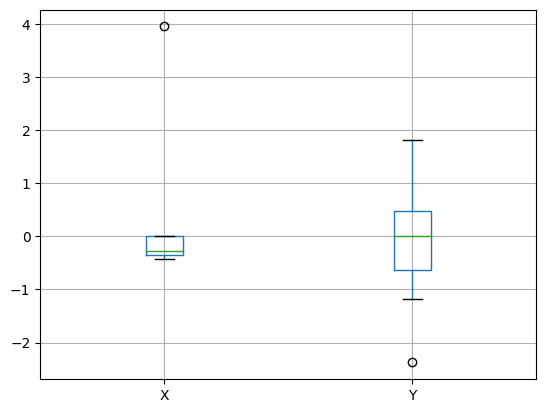

In [ ]:
boxplot = dfCleanCopy.boxplot(column=['X', 'Y'])
boxplot


In [ ]:
q1 = dfCleanCopy["X"].quantile(0.25)
q3 = dfCleanCopy["X"].quantile(0.75)
iqr = q3 - q1
# df_filtered = dfCleanCopy[(dfCleanCopy["X"] > q1 - (1.5*iqr)) & (dfCleanCopy["X"] < q3 + (1.5*iqr))]
#can be use 3std instead is BETTER
q1_y = dfCleanCopy["Y"].quantile(0.25)
q3_y = dfCleanCopy["Y"].quantile(0.75)
iqr_y = q3_y - q1_y
df_filtered = dfCleanCopy[(dfCleanCopy["X"] > q1 - (1.5*iqr)) & (dfCleanCopy["X"] < q3 + (1.5*iqr)) & (dfCleanCopy["Y"] > q1_y - (1.5*iqr_y)) & (dfCleanCopy["Y"] < q3_y + (1.5*iqr_y))]
print(df_filtered)

           X         Y     Z
0  -0.342883 -1.176146   cat
1  -0.001031 -0.944028   dog
2  -0.360414  0.000000  bird
3  -0.356031  1.332965   cat
4  -0.356031  0.000000   cat
5  -0.001031  0.483527   dog
7  -0.338500 -0.583717  bird
9  -0.426155  0.173621   cat
10 -0.001031  1.812758   cat
12 -0.426155 -0.637857   dog
13 -0.281525 -0.772896   dog
16 -0.268377  0.474814   dog
17 -0.250846  1.276958   dog
18 -0.001031  0.224650   dog
19 -0.228932  0.000000   cat


In [ ]:
df_filtered[['X', 'Y']] = scaler.fit_transform(df_filtered[['X', 'Y']])
df_filtered

<ipython-input-147-5eb2c70bd41f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['X', 'Y']] = scaler.fit_transform(df_filtered[['X', 'Y']])


,X,Y,Z
0,-0.645020,-1.526237,cat
1,1.555193,-1.250998,dog
2,-0.757851,-0.131593,bird
3,-0.729643,1.449003,cat
4,-0.729643,-0.131593,cat
5,1.555193,0.441760,dog
7,-0.616812,-0.823750,bird
9,-1.180969,0.074283,cat
10,1.555193,2.017929,cat
12,-1.180969,-0.887948,dog


<Axes: >

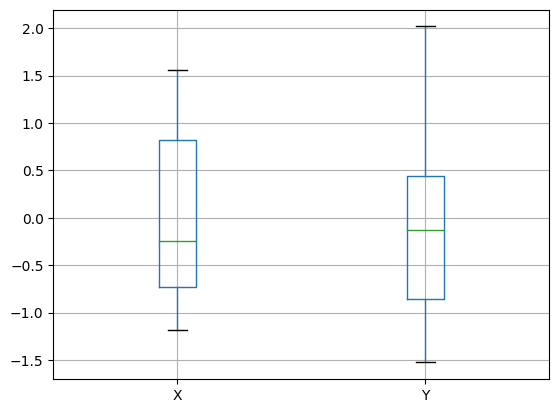

In [ ]:
boxplot = df_filtered.boxplot(column=['X', 'Y'])
boxplot


In [ ]:
df_filtered = df_filtered.reset_index()
df_filtered

,index,X,Y,Z
0,0,-0.645020,-1.526237,cat
1,1,1.555193,-1.250998,dog
2,2,-0.757851,-0.131593,bird
3,3,-0.729643,1.449003,cat
4,4,-0.729643,-0.131593,cat
5,5,1.555193,0.441760,dog
6,7,-0.616812,-0.823750,bird
7,9,-1.180969,0.074283,cat
8,10,1.555193,2.017929,cat
9,12,-1.180969,-0.887948,dog


In [ ]:
label_encode = preprocessing.LabelEncoder()
df_filtered['Z_category'] = label_encode.fit_transform(df_filtered['Z'])
df_filtered

,index,X,Y,Z,Z_category
0,0,-0.645020,-1.526237,cat,1
1,1,1.555193,-1.250998,dog,2
2,2,-0.757851,-0.131593,bird,0
3,3,-0.729643,1.449003,cat,1
4,4,-0.729643,-0.131593,cat,1
5,5,1.555193,0.441760,dog,2
6,7,-0.616812,-0.823750,bird,0
7,9,-1.180969,0.074283,cat,1
8,10,1.555193,2.017929,cat,1
9,12,-1.180969,-0.887948,dog,2


In [ ]:
dummies = pd.get_dummies(df_filtered['Z'])
df_onehot = pd.concat([df_filtered, dummies], axis = 1)
df_onehot

,index,X,Y,Z,Z_category,bird,cat,dog
0,0,-0.645020,-1.526237,cat,1,0,1,0
1,1,1.555193,-1.250998,dog,2,0,0,1
2,2,-0.757851,-0.131593,bird,0,1,0,0
3,3,-0.729643,1.449003,cat,1,0,1,0
4,4,-0.729643,-0.131593,cat,1,0,1,0
5,5,1.555193,0.441760,dog,2,0,0,1
6,7,-0.616812,-0.823750,bird,0,1,0,0
7,9,-1.180969,0.074283,cat,1,0,1,0
8,10,1.555193,2.017929,cat,1,0,1,0
9,12,-1.180969,-0.887948,dog,2,0,0,1
